In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Let's load our data and look at some of the data we have

In [4]:
housing_data = pd.read_csv("../data/external/housing.csv")
housing_data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


I decided to drop the date columns from the orignal data just to make it easier to work with.

In [5]:
housing_data = housing_data.drop(columns='date', axis=1)
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Our target variable is price, and we want to find out which features have a high correlation with the target variable. We can check for linear correlation between price and the other attributes by using the corr() method. For now, we are going only to work with numerical attributes.


In [13]:
corr_matrix = housing_data.corr(numeric_only = True)
corr_matrix['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

We can see that our most promising attribute is sqft_living. We still haven't taken a look at categorical attibutes like location, which we should expect to impact the price.

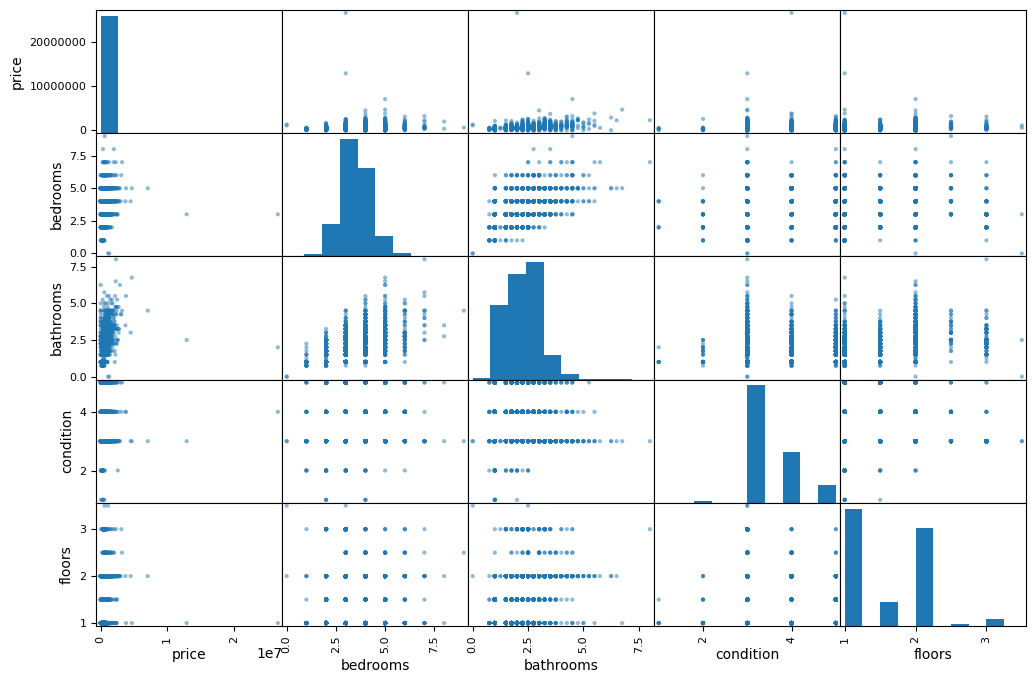

In [6]:
attributes = ["price","bedrooms", "bathrooms", "condition","floors"]
scatter_matrix(housing_data[attributes], figsize = (12,8))
plt.show()

The above figures display most of the categorical attributes found in our dataset so it's hard to tell
the correlation between all of them. Now let's plot out more contionus variables and see if we can make some conclusions

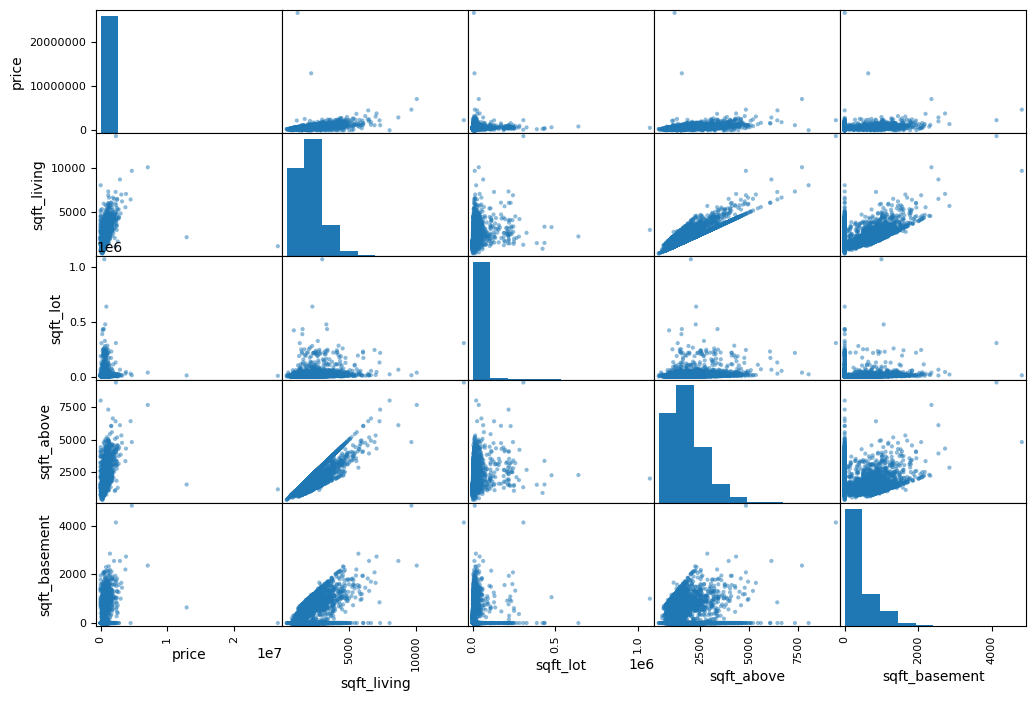

In [7]:
attributes = ["price","sqft_living", "sqft_lot", "sqft_above", 'sqft_basement']
scatter_matrix(housing_data[attributes], figsize = (12,8))
plt.show()

There is definitely a lot more visible correlation with the continous attributes which is to be expected. Now I would like to look at plots that look at price vs the other attributes but with price as the y-axis. For the sqft attributes, the histograms are skewed to the right and might be worth eventually transforming by taking the respective logarithms or square roots.

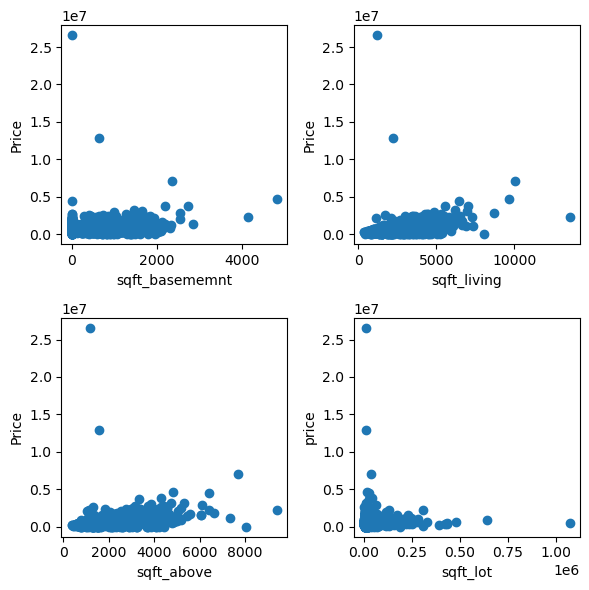

In [8]:
fig, ax = plt.subplots(2,2, figsize = (6,6))

ax[0,0].scatter(housing_data['sqft_basement'], housing_data['price'])
ax[0,0].set_xlabel('sqft_basememnt')
ax[0,0].set_ylabel('Price')

ax[0,1].scatter(housing_data['sqft_living'], housing_data['price'])
ax[0,1].set_xlabel('sqft_living')
ax[0,1].set_ylabel('Price')

ax[1,0].scatter(housing_data['sqft_above'], housing_data['price'])
ax[1,0].set_xlabel('sqft_above')
ax[1,0].set_ylabel('Price')


ax[1,1].scatter(housing_data['sqft_lot'], housing_data['price'])
ax[1,1].set_xlabel('sqft_lot')
ax[1,1].set_ylabel('price')


plt.tight_layout()
plt.show()

Due to a couple of outliers in price the majority of the data is stuck at the bottom of the plots so it will be worth eventually scaling our price coulumn or getting rid of the outliers. The sqft_lot also has outliers which are worth eventually checking out.

# Exploring Qualitive Data

The housing dataset without the date column contains only four qualtive attributes, which are the following columns: street, city, statezip, and country. The ones that we will take a look at are statezip and country since from city to city prices may not vary enough whereas in different states it is a more noticeable variation.